In [31]:
import cv2
import matplotlib.pyplot as plt
import src.basic_function_cap as bfc
import src.piano_key_notes as pkn
import ipywidgets as widgets
from ipywidgets import interact

# Crop video

In [2]:
cap = cv2.VideoCapture('mp4/autumn_leaves.mp4')

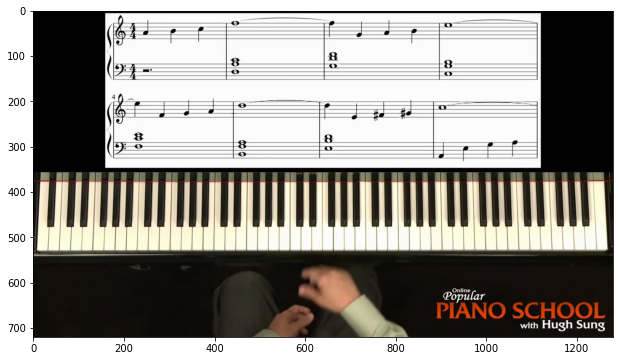

In [3]:
bfc.show_frame(cap, 219)
_, frame = bfc.get_frame(cap, 219)

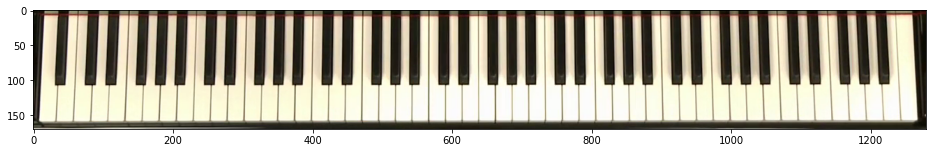

In [4]:
cropped = bfc.crop_frame(frame, 370, 0, 540-370, frame.shape[1], show=True)

In [6]:
# bfc.crop_and_save_video(cap, 370, 0, 540-370, frame.shape[1], 'mp4/autumn_cropped.mp4', 219, 32*32-10)

OpenCV: FFMPEG: tag 0x34363268/'h264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'


# Get notes

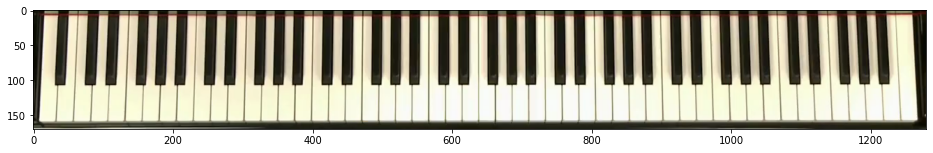

In [9]:
cap = cv2.VideoCapture('mp4/autumn_cropped.mp4')
bfc.show_frame(cap, 0)
image = bfc.get_frame(cap, 0)[1]

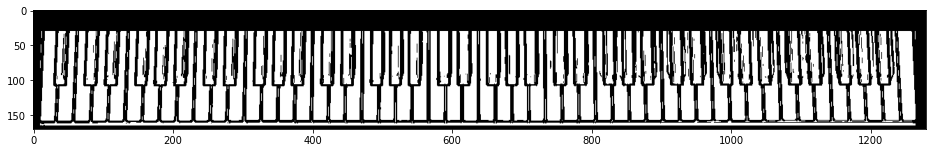

Number of connected components: 88


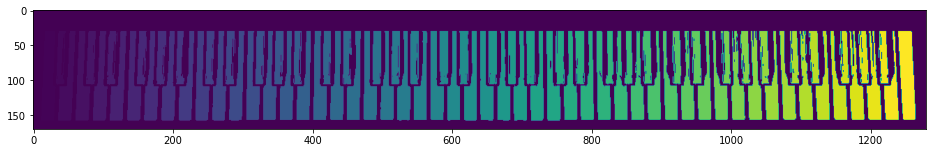

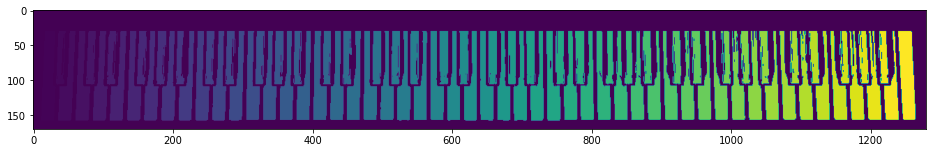

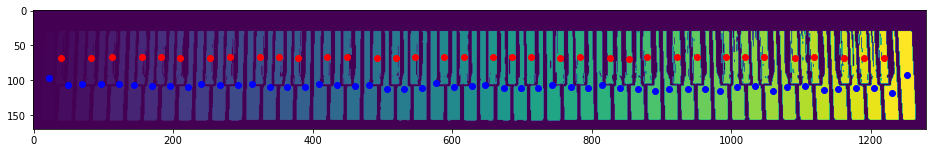

  0%|          | 0/36 [00:00<?, ?it/s]

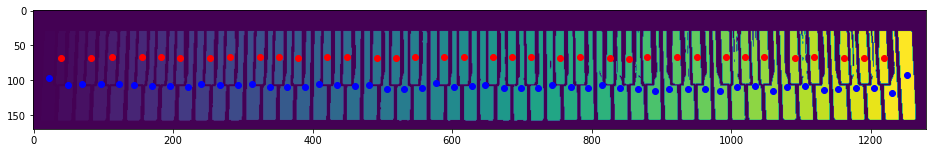

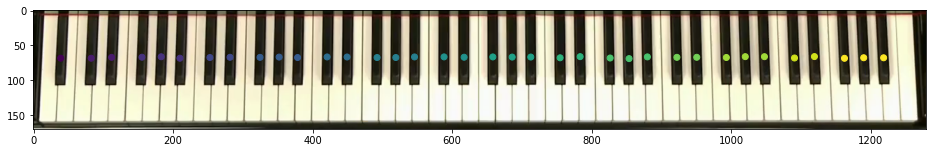

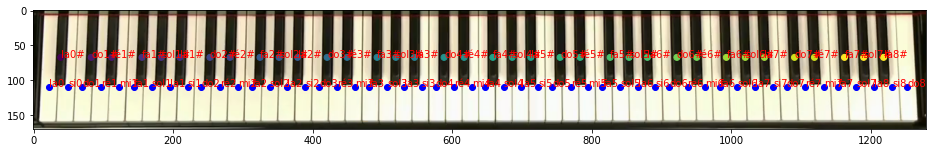

In [10]:
pipe = pkn.pipeline(image, with_hull=True, threshold = 4000, kx=20, crop=[30,5,10,15], min_area=200, max_width=200, show=True)
labels, black_keys, white_keys, n_labels, stats, centroids, group, notes, sobel = pipe

# Get difference

In [40]:
cap = cv2.VideoCapture('mp4/autumn_leaves.mp4')

def show_frame(frame_number, shift):
    _, mask = bfc.get_frame(cap, 219)
    _, frame = bfc.get_frame(cap, 219+frame_number)
    mask = bfc.crop_frame(mask, 330, 0, 540-330, frame.shape[1])
    frame = bfc.crop_frame(frame, 330, 0, 540-330, frame.shape[1])
    plt.figure(figsize=(16,16))
    plt.imshow(frame)
    plt.show()
    plt.figure(figsize=(16,16))
    plt.imshow(frame - mask + shift)
    plt.show()

interact(show_frame,
        frame_number=widgets.IntSlider(min=0, max=32*32-10, step=1, value=100),
        shift=widgets.IntSlider(min=0, max=30, step=1, value=0))

interactive(children=(IntSlider(value=100, description='frame_number', max=1014), IntSlider(value=0, descripti…

<function __main__.show_frame(frame_number, shift)>